# STAGE C QUIZ

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("darkgrid")
%matplotlib inline
import sklearn

In [3]:
# Loading the dataset
df = pd.read_csv("Data_for_UCI_named_stage3.csv")

In [21]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [22]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [25]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


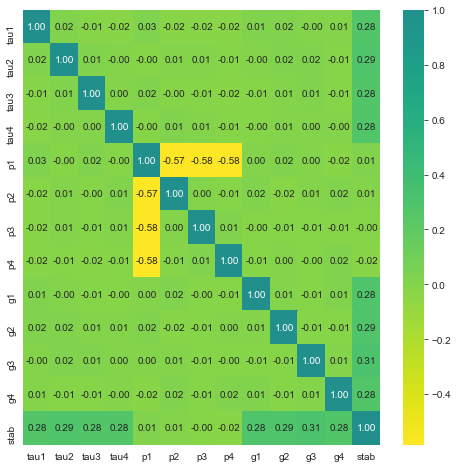

In [26]:
# Plotting the correlation heat map
plt.figure(figsize=(8,8))
sb.heatmap(df.corr(), annot=True, fmt=".2f", cmap="viridis_r", center=True);

In [28]:
# Dropping stab as instructed because it closely mirrors stabf or has been captured by stabf
df = df.drop(columns="stab)

In [31]:
# Separating the dataset into features (X) and labels(y)
X = df.drop(columns= 'stabf' )
y = df[ 'stabf' ] 

In [32]:
# Partitioning the dataset into train and test and seeding to a random state of 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
# Converting string to float using the label encoder
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
y_train_en = en.fit_transform(y_train).reshape(-1, 1) # These reshapings were recommended by sklearn to make them 2D
y_test_en = en.transform(y_test).reshape(-1, 1) 

In [38]:
# Using the standard scaler to fit transform X_train, and _y_train and then to transform X_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normalized_X_train = sc.fit_transform(X_train)
normalized_y_train = sc.fit_transform(y_train_en)
normalized_X_test = sc.transform(X_test)

In [44]:
# Importing the necessary tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Running the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(normalized_X_train, normalized_y_train.astype("int"))
pred_rfc = rfc.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
X_test[:20]

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314
8517,3.990416,2.238180,8.865393,2.445075,4.280272,-1.906110,-1.638935,-0.735228,0.865638,0.102075,0.075389,0.410814
2041,3.181476,9.882870,4.705103,7.622968,3.823214,-1.292930,-1.975583,-0.554701,0.326408,0.935396,0.171854,0.682263
1989,1.087526,7.603472,7.513216,5.835746,3.271700,-1.326866,-1.111919,-0.832916,0.749052,0.605793,0.839545,0.167653
1933,3.151032,4.637347,5.993463,8.470790,1.986972,-0.762484,-0.679137,-0.545350,0.917590,0.499896,0.513195,0.172073
9984,2.501787,3.087194,7.493896,2.177944,3.817471,-0.958986,-1.044281,-1.814205,0.503049,0.107808,0.534358,0.357840


In [51]:
print(classification_report(y_test_en, pred_rfc))
print(confusion_matrix(y_test_en, pred_rfc))

              precision    recall  f1-score   support

           0       0.36      1.00      0.53       712
           1       0.00      0.00      0.00      1288

    accuracy                           0.36      2000
   macro avg       0.18      0.50      0.26      2000
weighted avg       0.13      0.36      0.19      2000

[[ 712    0]
 [1288    0]]


In [52]:
# Using svm
clf = svm.SVC()
clf.fit(normalized_X_train, normalized_y_train.astype("int"))
pred_clf = clf.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
print(classification_report(y_test_en, pred_clf))
print(confusion_matrix(y_test_en, pred_clf))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.94      0.02      0.04       712
           1       0.00      0.00      0.00      1288

    accuracy                           0.01      2000
   macro avg       0.31      0.01      0.01      2000
weighted avg       0.33      0.01      0.01      2000

[[   0    0    0]
 [ 697   15    0]
 [1287    1    0]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Using Decision Tree Classifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalized_X_train, normalized_y_train.astype("int"))
pred_dec_tree = dec_tree.predict(X_test)

In [55]:
print(classification_report(y_test_en, pred_dec_tree))
print(confusion_matrix(y_test_en, pred_dec_tree))

              precision    recall  f1-score   support

           0       0.36      1.00      0.53       712
           1       0.00      0.00      0.00      1288

    accuracy                           0.36      2000
   macro avg       0.18      0.50      0.26      2000
weighted avg       0.13      0.36      0.19      2000

[[ 712    0]
 [1288    0]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> These models perform poorly. I don't know what to do. Perhaps my encoding is wrong. I shall keep looking for solution.

In [58]:
#-(3/7 np.log(3/7) + 4/7 np.log(4/7))